In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/VDT2022/mini-project/stroke_recovery_dataset/data/sb1_U80_F.csv')
df.head(10)

,Unnamed: 0,Date,step_counts,velocity
0,0,2020-01-01,342,0.4980
1,1,2020-01-02,347,0.5042
2,2,2020-01-03,332,0.4940
3,3,2020-01-04,343,0.4951
4,4,2020-01-05,343,0.5049
5,5,2020-01-06,336,0.5001
6,6,2020-01-07,344,0.4937
7,7,2020-01-08,343,0.4965
8,8,2020-01-09,343,0.5008
9,9,2020-01-10,341,0.4973


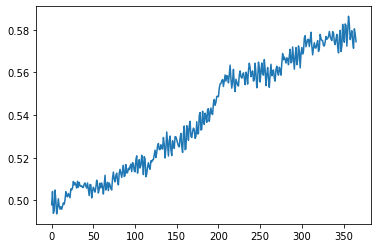

In [ ]:
count = df['velocity']
count.plot()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

WINDOW_SIZE = 12
X1, y1 = df_to_X_y(count, WINDOW_SIZE)
X1.shape, y1.shape

((354, 12, 1), (354,))

In [ ]:
X_train1, y_train1 = X1[:256], y1[:256]
X_val1, y_val1 = X1[256:329], y1[256:329]
X_test1, y_test1 = X1[329:], y1[329:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((256, 12, 1), (256,), (73, 12, 1), (73,), (25, 12, 1), (25,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((12, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=40, callbacks=[cp1])

Epoch 1/40
1/8 [==>...........................] - ETA: 10s - loss: 0.2611 - root_mean_squared_error: 0.5110

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 6s 644ms/step - loss: 0.2577 - root_mean_squared_error: 0.5077 - val_loss: 0.2940 - val_root_mean_squared_error: 0.5422
Epoch 2/40
1/8 [==>...........................] - ETA: 0s - loss: 0.2552 - root_mean_squared_error: 0.5052

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 5s 653ms/step - loss: 0.2481 - root_mean_squared_error: 0.4981 - val_loss: 0.2786 - val_root_mean_squared_error: 0.5278
Epoch 3/40
1/8 [==>...........................] - ETA: 0s - loss: 0.2371 - root_mean_squared_error: 0.4870

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 582ms/step - loss: 0.2324 - root_mean_squared_error: 0.4821 - val_loss: 0.2591 - val_root_mean_squared_error: 0.5090
Epoch 4/40
1/8 [==>...........................] - ETA: 0s - loss: 0.2238 - root_mean_squared_error: 0.4731

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 5s 658ms/step - loss: 0.2150 - root_mean_squared_error: 0.4637 - val_loss: 0.2389 - val_root_mean_squared_error: 0.4888
Epoch 5/40
8/8 [==============================] - ETA: 0s - loss: 0.1973 - root_mean_squared_error: 0.4442

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 581ms/step - loss: 0.1973 - root_mean_squared_error: 0.4442 - val_loss: 0.2187 - val_root_mean_squared_error: 0.4676
Epoch 6/40
1/8 [==>...........................] - ETA: 0s - loss: 0.1919 - root_mean_squared_error: 0.4380

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 5s 654ms/step - loss: 0.1796 - root_mean_squared_error: 0.4238 - val_loss: 0.1983 - val_root_mean_squared_error: 0.4453
Epoch 7/40
1/8 [==>...........................] - ETA: 0s - loss: 0.1695 - root_mean_squared_error: 0.4117

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 580ms/step - loss: 0.1618 - root_mean_squared_error: 0.4023 - val_loss: 0.1780 - val_root_mean_squared_error: 0.4219
Epoch 8/40
1/8 [==>...........................] - ETA: 0s - loss: 0.1492 - root_mean_squared_error: 0.3863

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 5s 652ms/step - loss: 0.1395 - root_mean_squared_error: 0.3735 - val_loss: 0.1437 - val_root_mean_squared_error: 0.3790
Epoch 9/40
1/8 [==>...........................] - ETA: 0s - loss: 0.1209 - root_mean_squared_error: 0.3477

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 633ms/step - loss: 0.1074 - root_mean_squared_error: 0.3277 - val_loss: 0.1062 - val_root_mean_squared_error: 0.3259
Epoch 10/40
1/8 [==>...........................] - ETA: 0s - loss: 0.0900 - root_mean_squared_error: 0.3000

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 584ms/step - loss: 0.0764 - root_mean_squared_error: 0.2764 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2700
Epoch 11/40
1/8 [==>...........................] - ETA: 0s - loss: 0.0600 - root_mean_squared_error: 0.2449

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 578ms/step - loss: 0.0467 - root_mean_squared_error: 0.2162 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1929
Epoch 12/40
1/8 [==>...........................] - ETA: 0s - loss: 0.0306 - root_mean_squared_error: 0.1749

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 5s 748ms/step - loss: 0.0200 - root_mean_squared_error: 0.1416 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 13/40
1/8 [==>...........................] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.1001

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 636ms/step - loss: 0.0051 - root_mean_squared_error: 0.0712 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 14/40
1/8 [==>...........................] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0319

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


8/8 [==============================] - 4s 589ms/step - loss: 3.6142e-04 - root_mean_squared_error: 0.0190 - val_loss: 1.0312e-05 - val_root_mean_squared_error: 0.0032
Epoch 15/40
8/8 [==============================] - 0s 11ms/step - loss: 3.2596e-04 - root_mean_squared_error: 0.0181 - val_loss: 2.7017e-04 - val_root_mean_squared_error: 0.0164
Epoch 16/40
8/8 [==============================] - 0s 10ms/step - loss: 5.8144e-04 - root_mean_squared_error: 0.0241 - val_loss: 1.8248e-04 - val_root_mean_squared_error: 0.0135
Epoch 17/40
8/8 [==============================] - 0s 10ms/step - loss: 3.1517e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.5248e-05 - val_root_mean_squared_error: 0.0039
Epoch 18/40
8/8 [==============================] - 0s 17ms/step - loss: 7.8271e-05 - root_mean_squared_error: 0.0088 - val_loss: 6.0894e-05 - val_root_mean_squared_error: 0.0078
Epoch 19/40
8/8 [==============================] - 0s 27ms/step - loss: 3.5046e-05 - root_mean_squared_error: 0.0059 - va

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.513749,0.4959
1,0.513588,0.4973
2,0.513214,0.4988
3,0.513414,0.4982
4,0.513540,0.5002
...,...,...
251,0.562100,0.5638
252,0.562178,0.5584
253,0.561876,0.5604
254,0.561948,0.5611


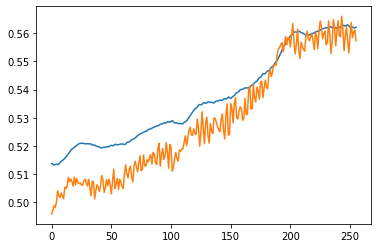

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])